#**THỰC HÀNH K-NEAREST NEIGHBORS**

**Câu 1: Toy example với Iris dataset**

Số mẫu: 150
Tên các lớp: ['setosa' 'versicolor' 'virginica']

Độ chính xác khi k=5: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



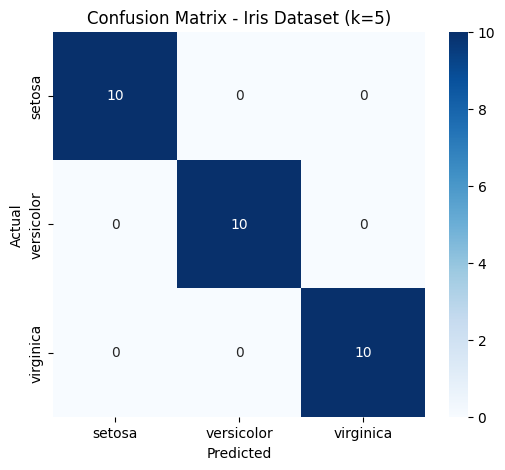

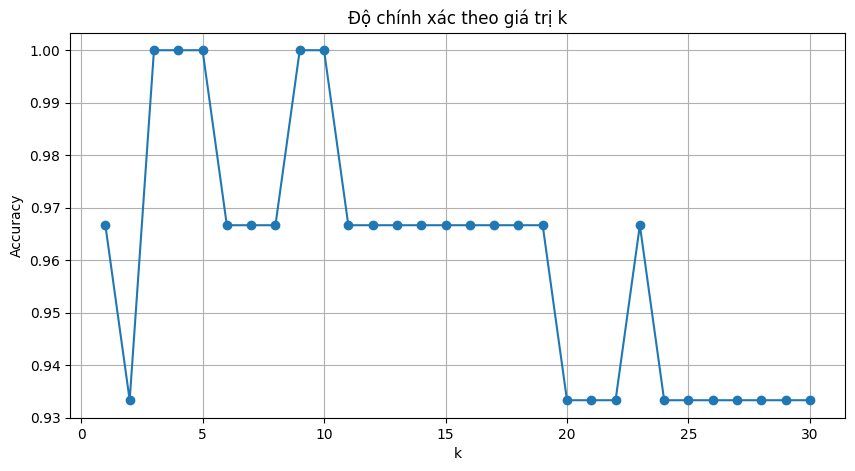

k tốt nhất: 3 - Accuracy: 1.0


In [1]:
# CÂU 1: Phân loại hoa Iris bằng KNN
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Load dữ liệu Iris
iris = datasets.load_iris()
X = iris.data    # 4 đặc trưng: sepal length, sepal width, petal length, petal width
y = iris.target  # 3 lớp: 0=Setosa, 1=Versicolour, 2=Virginica

print("Số mẫu:", len(X))
print("Tên các lớp:", iris.target_names)

# 2. Chia train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Huấn luyện KNN với k=5 (có thể thử nhiều k)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4. Dự đoán và đánh giá
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác khi k={k}: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 5. Confusion matrix (đẹp hơn bằng seaborn)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Iris Dataset (k={k})')
plt.show()

# 6. Thử nhiều giá trị k để tìm k tốt nhất
accuracies = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Độ chính xác theo giá trị k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print("k tốt nhất:", k_values[np.argmax(accuracies)], "- Accuracy:", max(accuracies))

**Câu 2: Nhận dạng chữ cái (Letter Recognition) - 20,000 mẫu, 26 lớp**

In [2]:
# CÂU 2: Letter Recognition Dataset (A-Z)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 1. Tải dữ liệu (file có sẵn trên UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter'] + [f'feature_{i}' for i in range(16)]

df = pd.read_csv(url, header=None, names=columns)
print(df.head())
print("Shape:", df.shape)  # (20000, 17)

# 2. Tiền xử lý
X = df.drop('letter', axis=1)
y = df['letter']

# Chuẩn hóa dữ liệu (rất quan trọng với KNN dựa trên khoảng cách)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# 4. Huấn luyện KNN (k=3 hoặc k=4 thường tốt nhất cho dataset này)
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)  # n_jobs=-1 để chạy nhanh hơn
knn.fit(X_train, y_train)

# 5. Đánh giá
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác KNN (k=3): {acc*100:.2f}%")

# 6. Thử nhiều k (từ 1 đến 10)
print("\nThử nhiều giá trị k:")
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"k={k:2d} → Accuracy: {acc*100:.2f}%")

  letter  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0         13          0          6          6          10           8   
1          5          5          4         13           3           9   
2          6          2          6         10           3           7   
3          9          4          6          4           4          10   
4          6          6          6          6           5           9   

   feature_12  feature_13  feature_14  feature_15  
0           0           8           0   